## Import Libraries

In [1]:
# Loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# For display
%matplotlib inline

# Setting format for not to display in scientific notation 
pd.options.display.float_format = '{:.2f}'.format

## Load the Pre-Processed data

In [2]:
# Laod the data
raw_df = pd.read_csv("PreProcessed.csv")

In [3]:
raw_df.shape

(42185, 196)

In [5]:
import pickle

# Load the mappings
pickle_file = open('mappings.pickle', 'rb')
mappings = pickle.load(pickle_file)

In [7]:
len(mappings)

194

## Eploring the dataset

In [9]:
raw_df.head()

,0,1,2,3,4,5,6,7,8,9,...,186,187,188,189,190,191,192,193,actual_time_to_travel,time_taken_sofar
0,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,nan,nan
1,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10.00,0.00
2,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,51.00,10.00
3,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,20.00,61.00
4,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10.00,81.00


### Explore the response variable: Actual time to travel between the bus stops

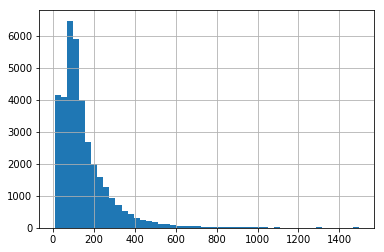

In [10]:
# Plot the historam
raw_df['actual_time_to_travel'].hist(bins = 50)

In [11]:
raw_df['actual_time_to_travel'].describe()

count   36566.00
mean      149.20
std       141.02
min         9.00
25%        70.00
50%       110.00
75%       189.00
max      1495.00
Name: actual_time_to_travel, dtype: float64

In [12]:
# Check for Null Values
raw_df['actual_time_to_travel'].hasnans

True

In [13]:
# Drop Nan values
filtered_df = raw_df.dropna(subset=['actual_time_to_travel'])

In [14]:
filtered_df.shape

(36566, 196)

### Split into Train and Test datasets

In [15]:
X = filtered_df.loc[:,filtered_df.columns != 'actual_time_to_travel']
Y = filtered_df.actual_time_to_travel

In [16]:
X.shape

(36566, 195)

In [17]:
Y.shape

(36566,)

In [18]:
# Import `train_test_split` from `sklearn.model_selection`
from sklearn.model_selection import train_test_split

# Split the data up in train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [19]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,185,186,187,188,189,190,191,192,193,time_taken_sofar
1964,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2181.00
29453,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4831.00
14442,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1922.00
20591,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1196.00
39011,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1584.00


### Standardize The Data

In [20]:
# Import `StandardScaler` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)
# Scale the train set
X_train_normalized = scaler.transform(X_train)
# Scale the test set
X_test_normalized = scaler.transform(X_test)

In [23]:
X_train_normalized[0]

array([ 1.0178073 , -0.15752192, -0.10211283, -0.94984146, -0.15752192,
       -0.40826566,  2.32507632, -0.40277896, -0.40369566, -0.38060607,
       -0.41944708, -0.24045922, -0.21789258, -0.10374102, -0.10211283,
       -0.11120541, -0.11869572, -0.12010944, -0.11710602, -0.11170842,
       -0.11402791, -0.07440841, -0.11678563, -0.11678563, -0.11598099,
       -0.11120541, -0.12350093, -0.11885358, -0.12486337, -0.12843018,
       -0.12784218, -0.12710361,  7.87678095, -0.12886953, -0.12916165,
       -0.13003434, -0.1463423 , -0.13318852, -0.13403675, -0.13361326,
       -0.13304666, -0.12650985, -0.04948837, -0.12456181, -0.13333024,
       -0.13502009, -0.13219252, -0.12930748, -0.12988927, -0.13032402,
       -0.12988927, -0.13190667, -0.13162023, -0.13190667, -0.12930748,
       -0.13017926, -0.12531442, -0.11204257, -0.10900019, -0.10762175,
       -0.1132047 , -0.11237577, -0.11287382, -0.11662512, -0.11204257,
       -0.13389572, -0.11402791, -0.13571842, -0.1072745 , -0.10

### Build the model

In [24]:
def plot_train_val_loss(hist):
    plt.plot(hist['loss'])
    plt.plot(hist['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [25]:
X_train_normalized.shape

(27424, 195)

### Deep Network

In [109]:
# Import `Sequential` from `keras.models`
from keras.models import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense

# Initialize the constructor
model = Sequential()

# Add an input layer: Same as input_dim with additional one for the bias term 
model.add(Dense(256, activation='relu', input_dim=195))

# Add one hidden layer: One hidden layer is sufficient for majority of the problems
# The optimal size of the hidden layer is usually between the size of the input and size of the output layers
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))

# Add an output layer 
model.add(Dense(1, activation='linear'))

In [114]:
# Compile and fit the model
model.compile(optimizer='Adadelta',
              loss='mean_squared_error')

BATCH_SIZE = 128
EPOCHS = 50

history = model.fit(
    X_train_normalized, Y_train,
    epochs=EPOCHS, 
    batch_size=BATCH_SIZE,
    validation_data=(X_test_normalized,Y_test),
    verbose=1)

Train on 27424 samples, validate on 9142 samples
Epoch 1/50
27424/27424 [==============================] - 2s 70us/step - loss: 6059.7903 - val_loss: 28212.8097
Epoch 2/50
27424/27424 [==============================] - 1s 51us/step - loss: 5856.0499 - val_loss: 27101.8420
Epoch 3/50
27424/27424 [==============================] - 1s 51us/step - loss: 5578.2037 - val_loss: 25345.9063
Epoch 4/50
27424/27424 [==============================] - 1s 50us/step - loss: 5453.6020 - val_loss: 24685.3463
Epoch 5/50
27424/27424 [==============================] - 1s 51us/step - loss: 5303.3863 - val_loss: 24295.6396
Epoch 6/50
27424/27424 [==============================] - 1s 51us/step - loss: 5235.1181 - val_loss: 26362.0369
Epoch 7/50
27424/27424 [==============================] - 1s 50us/step - loss: 5118.2377 - val_loss: 26899.9012
Epoch 8/50
27424/27424 [==============================] - 1s 51us/step - loss: 5016.4877 - val_loss: 25065.7264
Epoch 9/50
27424/27424 [==============================]

In [115]:
from sklearn.metrics import r2_score

Y_pred_train = model.predict(X_train)
r2Score = r2_score(Y_train, Y_pred_train) 
print('Train R-Square:',r2Score)

Y_pred_test = model.predict(X_test)
r2Score = r2_score(Y_test, Y_pred_test) 
print('Test R-Square:',r2Score)

Train R-Square: 0.925656893231
Test R-Square: -0.598702586612


In [116]:
from sklearn.metrics import mean_squared_error

mse_train = mean_squared_error(Y_train, Y_pred_train)
mse_test = mean_squared_error(Y_test, Y_pred_test)

print('Train MSE:',mse_train)
print('Test MSE:',mse_test)

Train MSE: 1500.29630162
Test MSE: 30385.8484008


In [41]:
#plot_train_val_loss(history.history)

## Model 1: Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit( X_train, Y_train ) # Not on normalized features

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [30]:
from sklearn.metrics import mean_squared_error, r2_score

Y_pred = lreg.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test, Y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_test, Y_pred))

Mean squared error: 18943.13
Variance score: 0.00


In [32]:
pred_test_df = pd.DataFrame( data = {'Y_test':Y_test, 'Y_pred':Y_pred} )

In [34]:
pred_test_df.head()

,Y_pred,Y_test
30437,147.00,89.00
22166,167.34,99.00
1377,131.29,10.00
21280,139.38,90.00
24791,173.24,220.00


In [35]:
pred_test_df.corr()

,Y_pred,Y_test
Y_pred,1.00,0.07
Y_test,0.07,1.00


## Model 2: Random Forest regressor

In [38]:
from sklearn.ensemble import RandomForestRegressor

# Default values: n_estimators=10, criterion=’mse’
rfRegr = RandomForestRegressor(random_state = 2)
rfRegr.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=2, verbose=0, warm_start=False)

In [39]:
Y_pred = rfRegr.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test, Y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_test, Y_pred))

Mean squared error: 19881.18
Variance score: -0.05
